# Transfert learning: Notion et application

Le document suivant est une suite de la partie sur le deep learning et les réseau de convolution. On s'intéressera ici aux modèles pré-entrainés (transfert learning).
L'idée étant de comprendre l'intéret de ces méthodes pour notre projet.

Notre document est stucturé de la manière suivante:
    
1. Définition du tranfert learning
2. Un exemple d'application
3. Application au data set Cat/Dog de notre Kaggle
    * Chargement des données
    * Prétraitement des images
    * Modélisation sur les données sur "ImageNet"
        * Inception ResNetV2
        * VGG_16
        * Inception_V3
        * ResNet50
        * MobileNet
4. Résultat
5. Source

## I- Définition du Transfert learning 

Il s'agit d'une méthode de machine learning pour laquelle on utilise un modèle qui a été developpé sur un projet comme point de départ de la modélisation de notre projet.

<img src="https://elearningindustry.com/wp-content/uploads/2016/09/5-tips-improve-knowledge-transfer-elearning-e1475138920743.jpeg" width="1000px"/>


L'image ci-dessus représente ce que le modèle fait pour vous.
Il conserve l'apprentissage fait sur un problème similaire pour l'appliquer sur un nouveau jeu de données.


Les approches de modèles pré-entrainés sont les suivantes:


   1. On utilise **un modèle générique sourcé**. Un modèle pré-entrainée est choisi parmis les modèles disponibles. Beaucoup d'intitutions de recherches ont mis à disposition des modèles entrainés sur des jeux de données très large.


   
   2. La **réutilisation de modèle non générique**. Le modele pré-entrainée peut être utiliser comme un point de départ pour un modèle sur un autre jeu de donnée. Ceci peut impliquer l'utilisation de l'ensemble du modèle ou simplement d'une partie, cela dépendra de la technique de modélisation utilisée.
  
   <br/>

   3. **L'optimisation de modèle**. De manière optionel, le modèle peut avoir besoin d'être adapter où améliorer sur la paire entrée-sortie des données disponible pour une tache a intéret.

   <br/>

Voici quelques exemples de modèles pré-entrainnés de premier type<br/>
<a href="https://github.com/KaimingHe/deep-residual-networks">Microsoft ResNet Model</a> <br/>
<a href="https://github.com/tensorflow/models/tree/master/inception">Google Inception Model</a> <br/>
<a href="https://github.com/BVLC/caffe/wiki/Model-Zoo">Caffe Model Zoo</a>



## II- Un exemple d'application: 

<img src="img/cat.1.jpg" width="400" >

Lui, c'est **Nestor**, la mascotte de ce Kaggle. Je me suis longtemps demander de quel type il pouvait être. Je sais que ca n'est pas un siamois où un persan et mes compétences dans ce domaine restent assez limitées.
Le mieux serait d'avoir un expert sous la main où à défaut, un modèle qui nous permette de classifier cette image suivant son type.

Et ce modèle existe. Il s'agit du **VGG16**!

Le code ci-dessous, permet d'utiliser ce modèle pré-entrainé pour déterminer le type de chat auquel appartient Nestor. Le modèle VGG16 sera détaillé dans la suite de ce notebook.

In [2]:
#### VGG16 préentrainé

#### Importation des librairies de deep learning
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

### On lance le modèle VGG16 (Initialisation)
model = VGG16() # Création du modèle VGG-16 implementé par Keras

#### Chargement de l'image
img = load_img('img/cat.1.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

Using TensorFlow backend.


In [3]:
#### Importation de la fonction decode_predictions
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n02123045', 'tabby', 0.49306288), ('n02123159', 'tiger_cat', 0.3585385), ('n02124075', 'Egyptian_cat', 0.06993359)]


Ici notre algorithme nous montre que les trois types de chats les plus probables sont:

* Le **tabby** avec **49,3 %** de chance
* Le **chat tigre** avec **35.8 %** de chance
* Le **chat egyptien** avec **6.9 %** de chance

<img src="img/cat.1_.jpg" width = "400" >

Une recherche Google confirme la première prédiction. Même si dans l'absolu ça n'est pas suffisant...
<img src="img/tabby_cat.png"  >

# III- Application au data set cat/dog de notre Kaggle

### 1. Chargement des données

In [6]:
#### Importation des librairies python

import numpy as np #Librairie de calcul
import pandas as pd #Management des données
import matplotlib.pyplot as plt#Librairie graphique
import seaborn as sns #Librairie stat graphique

import random # Nombre aléatoire
import cv2 # Traitement image
import os ## Systeme
import gc ## Garbage collector

from sklearn.model_selection import train_test_split ### Séparation du jeu de train et de test
from keras.applications import InceptionResNetV2 ### Modèle Inception ResNet
from keras import layers ### Importation de couche
from keras import models ### Importation de modèle
from keras.preprocessing.image import ImageDataGenerator ### Redimensionnement des pixels
from keras.preprocessing.image import img_to_array, load_img ### Chargement des images

In [33]:
#### On crée les jeux de train et de test

#### Chemin d'accès jusqu'au jeu d'entraineemnt et de test (A modifier sur votre machine)
train_dir = 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train'
test_dir = 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test'

### Séparation des élements "dog" et "cat"

#### Pour le jeu de train, on sépare les éléments 'dog' et 'cat' et l'on stocke chacun dans une variable
train_dogs = ['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] 
train_cats = ['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  

#### On stocke les élements du jeu de test (liste de chemin) dans la variable test_imgs
test_imgs = ['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/{}'.format(i) for i in os.listdir(test_dir)] 

In [3]:
test_imgs[1:10] #### Un exemple d'élement dans le jeu de test

['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/100.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/1000.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10000.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10001.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10002.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10003.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10004.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/10005.jpg']

On regarde le nombre d'élement dans chacune de nos variables. 

In [4]:
len(train_dogs) ### 12500
len(train_cats) ### 12500

12500

On a donc **25000** images au total dans notre jeu de donnée. Ce qui est cohérent avec la description du Kaggle. 

#### Capacité de calcul et adaptation

La machine qui me sert à lancer mes modèles n'étant pas suffisament puissante, il me faut limiter mes jeux d'entrainements et de tests. 
On prendra **4000 images** de chaque type pour notre jeu de train. Soit **8000** images en tout au lieu de 25000.

In [35]:
#### Modification du jeu d'netrainement

size=4000 ### On prend 4000 éléments de la liste "chien" et 4000 élements de la liste "chat"
train_imgs = train_dogs[0:size] + train_cats[0:size]
# type(train_imgs)
random.shuffle(train_imgs) #### On mélange aléatoirement les élements 'dog' et 'cat'
#print(train_imgs)

In [6]:
train_imgs[1:8] ### Un échantillon de notre dataset d'images

['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/cat.12034.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/dog.183.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/cat.11032.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/cat.10203.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/dog.10300.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/dog.11471.jpg',
 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/cat.10433.jpg']

### 2 - Traitement des données

Une fois notre jeu d'entrainement constitué, il nous faut le traiter de manière à le rendre compatible avec nos modèles.
C'est le rôle des fonctions **cv2.resize** et **cv2.imread**

Pour le traitement, on définit la fonction **read_and_process_data**.
Cette fonction prend en entrée notre liste d'image et retourne trois élement.
* La variable **X** qui correspond aux images pixelisées.
* La variable **y**  qui est notre cible.
* La variable **l_id** qui correspond aux modalités de l'images.

Les fonctions **cv2.imread** et **cv2.resize** permettent de faire lire les images par la machine et de les redimensionner au format 150*150 px

In [7]:
img_size = 150

#### On définit une fonction qui prend en entrée une liste d'image
def read_and_process_image(list_of_images):
    """
    La fonctionne renvoie trois tableaux (array): 
        X est le tableau des images redimentionné (resize) 
        y est le ableau des cible (label) 
        l_id est un tableau qui contient les nom (chien, chat) pour la soumission du script kaggle 
    """
    X = [] # On initialise une liste qui comprendras les images
    y = [] # On initialise une liste qui comprendras les abels
    l_id = [] # On initialise une liste qui comprendras les id (dog, cat)
    
    
    #### Pour chaque élement de la liste d'image
    for image in list_of_images:
        ### On ajoute dans la liste X les images redimensionnés 
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (img_size,img_size), interpolation=cv2.INTER_CUBIC))  #Lecture et redimensionnement de l'image
        basename = os.path.basename(image)# On stocke le chemin de chaque image dans la variable basename
        img_num = basename.split('.')[0] # On extrait le nom de l'animal ie 'dog' ou 'cat'
        l_id.append(img_num) ### On ajoute ce nom dans la liste l_id
        
        ### On crée un vecteur de cible y pour les modalités "dog" et "cat"
        if 'cat' in image: ### Si la chaine de caractère "dog" est contenu dans la liste "image" alors on ajoute un 1 à la liste y
            y.append(1)
        #### Sinon 0    
        else:
            y.append(0)
    
    return X, y, l_id #### On retourne trois élements, les images redimentionnés, le vecteur cible et l_id

Une fois la fonction crée, il nous suffit de la lancer et d'obtenir nos variables **X , y** et **l_id**.

In [8]:
#### On crée trois nouvelles variables qui correspondent aux images redimentionnées, à la cible et a la liste de modalité kaggle

X, y, l_id = read_and_process_image(train_imgs)

In [9]:
y[:20] ### Affichage de la variable cible

[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]

Il serait intéressant de voir les images que l'on a chargés et redimensionnés. Ici, on choisis de faire apparaitre les 5 premières images de notre dataset X.

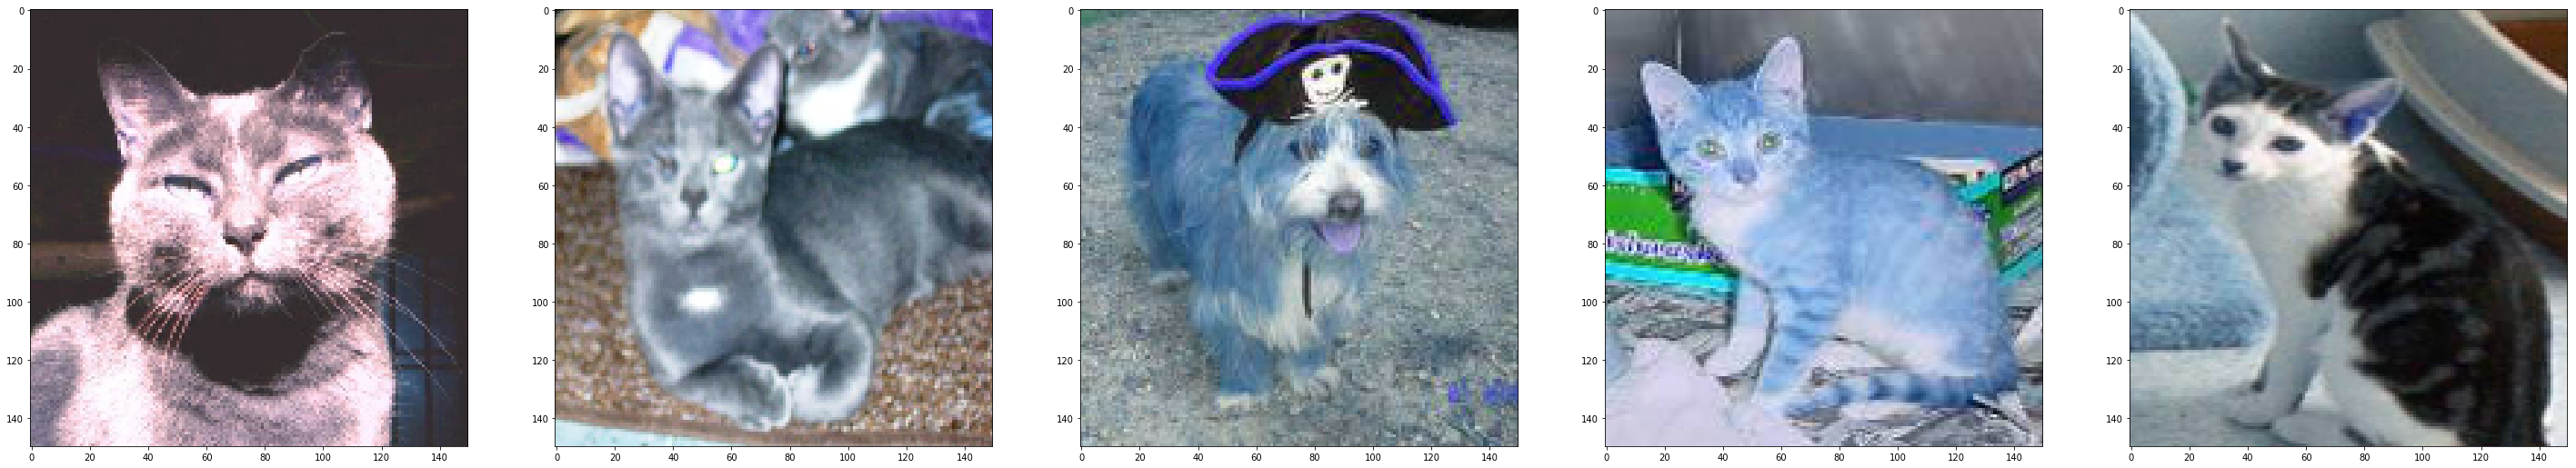

In [10]:
### On affiche les images du data set X constitué

plt.figure(figsize=(50,50))
columns = 5 ### Nombre d'image à afficcher
for i in range(columns): #### Pour l'ensemble des images jusqu'à colums
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i]) ### Affichage de l'image 

Un autre moyen de vérifier la cohérence de notre travail peut être de tracer le nombre d'élement 'cat' et 'dog' dans notre jeu de train.

Pour ce faire, il nous faut d'abord convertir nos listes, X et y en **array** numpy

In [11]:
type(X) ### Type générer par notre fonction read_and_process_image()

list

In [12]:
X = np.array(X) ### On convertit nos images en array numpy pour pouvoir les afficher
y = np.array(y)

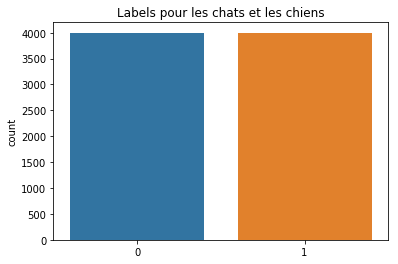

In [13]:
#### On compte le nombre de chiens et de chats dans notre vecteur cible y
### On utilise le package seaborn pour l'affichage du comptes de nos images par modalités
sns.countplot(y)

plt.title('Labels pour les chats et les chiens') 
plt.show()### Même répartition chien chat dans la variable cible (4000 *2)

La répartition est la même que celle-choisie précédemement.

In [14]:
print("Les dimensions des images du jeu de train sont:", X.shape) ### 8000 images de dimension 150, 150 et 3
print("Les dimensions des images du label sont:", y.shape)

Les dimensions des images du jeu de train sont: (8000, 150, 150, 3)
Les dimensions des images du label sont: (8000,)


In [15]:
### On crée un jeu de validation à partir de notre train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)
X_train = np.array(X_train) ### On convertit nos images en array numpy pour pouvoir les afficher
y_train = np.array(y_train)
X_val = np.array(X_val) ### On convertit nos images en array numpy pour pouvoir les afficher
y_val = np.array(y_val)

Notre capacité de stockage sur cette machine étant limité, il nous faut faire de la place de supprimant nos variables  **X, y train_imgs, train_dogs** et **train_cats**

In [17]:
del X#### On libère de la mémoire pour augmenter notrevitesse de calcul
del y
del train_imgs
del train_dogs
del train_cats
gc.collect() ### Taille de donnée libérée par le garbage collector

13716

On crée un jeu de validation pour que nos calculs soient plus rapide sur cette machine.

In [20]:
### Les dimensions de notre nouveua jeu de données
print("Les dimensions de X_train",X_train.shape)
print("Les dimensions de X_val", X_val.shape)

Les dimensions de X_train (6800, 150, 150, 3)
Les dimensions de X_val (1200, 150, 150, 3)


## Modélisation sur les données sur "ImageNet"

Dans cette partie, nous testerons 5 modèles de reconnaissance d'images basée sur la base de données "ImageNet"
   * **Inception ResNetV2**
   * **VGG_16**
   * **Inception_V3**
   * **ResNet50**
   * **MobileNet**

### a) Inception ResNetV2

**Principe**:

Le réseau **Inception Resnet V2** est un réseau de convolution constitué d'une succession de couche de convolution, de pooling, de flatten et de dropout. Il a été mis à la disposition du public par Google en 2016.

**Architecture**:
    
La première figure correspond au réseau etendu. Il est bien plus profond que son ancienne version, le **InceptionV3**. En dessous de cette figure on a le détail du modèle où la répétition de blocks résiduels a été compresser. 
Ici, on remarque que les blocks **Inception** ont été simplifier, en contenant moins de tours parallèlles que dans le InceptionV3.

<img src="https://1.bp.blogspot.com/-O7AznVGY9js/V8cV_wKKsMI/AAAAAAAABKQ/maO7n2w3dT4Pkcmk7wgGqiSX5FUW2sfZgCLcB/s1600/image00.png" width = "1000px"/>

Avantage:

L'architecture **Inception-ResNet-V2** est plus précise que la version précédente comme on peut le voir sur ce rapport sur  la compétition **ILSVRC 2012**.
De plus, ce nouveau modèle n'a besoin que de deux fois plus de mémoire et de temps de calcul que le Inception V3.

<img src = "img/resultat_inception.png" width = "600">

On lance le réseau **InceptionResNet** sur notre **X_train** et on le test sur **X_val**

In [22]:
#### Dimension du jeu de train
ntrain = len(X_train)
nval = len(X_val)

In [23]:
#### On définie notre réseau InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=[150, 150, 3])  ### Attention aux données d'entrée ici 150 * 150 *3
conv_base.trainable = False

In [24]:
#### Ajoute en fin de reseau des fonctions d'activations
model = models.Sequential() #Initialisation
model.add(conv_base) # Inception
model.add(layers.Flatten()) # Ajout d'un Flatten 
model.add(layers.Dense(256, activation='relu')) ### Fonction d'activation
model.add(layers.Dense(1, activation='sigmoid'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) ### La métrique est l'accuracy

In [25]:
#### On redimensionne les pixels pour qu'ils soient compris entre 0 et 1
batch_size = 128 ### Paramètre à faire varier 
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow(X_train, y_train,  batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [26]:
#### On lance notre modèle
epochs = 2 ### Paramètre à faire varier (Ici 1 car capacité machine limité)
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/2
53/53 [==============================] - 1662s 31s/step - loss: 0.5642 - acc: 0.8113 - val_loss: 0.3243 - val_acc: 0.9497
Epoch 2/2
53/53 [==============================] - 1567s 30s/step - loss: 0.2743 - acc: 0.8805 - val_loss: 0.3851 - val_acc: 0.9506


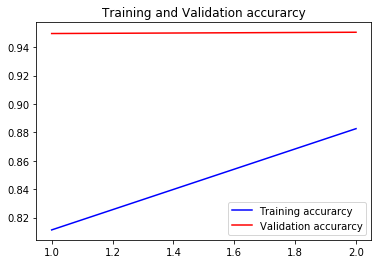

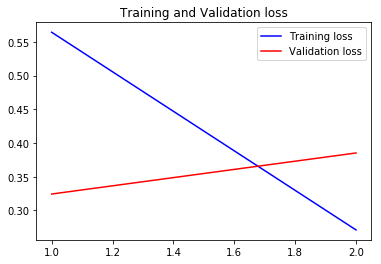

In [40]:
#### On affiche notre accuracy en fonction du nombre d'epoch

acc = history.history['acc']### Paramètre du modèle: Accuracy
val_acc = history.history['val_acc'] ### Paramètre du modèle: Val_acc
loss = history.history['loss'] ### Paramètre du modèle: loss
val_loss = history.history['val_loss'] ### Paramètre du modèle: val_loss

epochs = range(1, len(acc) + 1) ### Ensemble d'epoch testée

# Affichage de l'accuracy en fonction du nombre d'epoch
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

# Affichage de la loss en fonction du nombre d'epoch
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

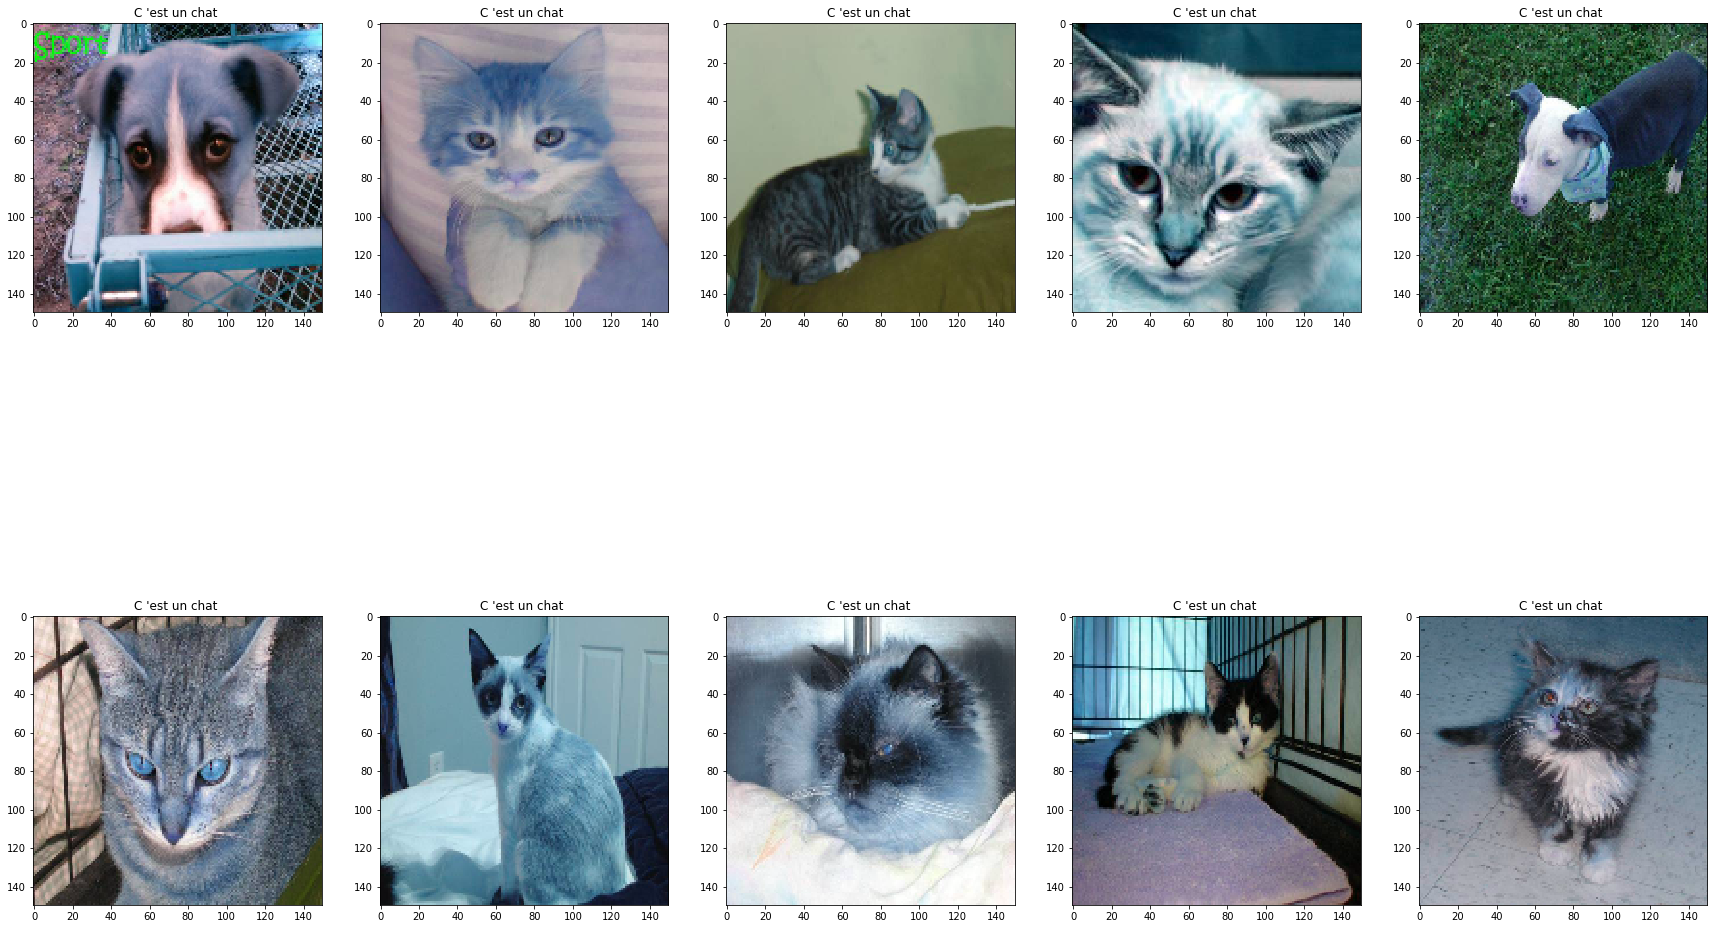

In [41]:
#### On applique notre modèle sur le jeu de test

X_test, y_test, l_id = read_and_process_image(test_imgs[10:20]) #Application du modèle sur le jeu de test
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
columns = 5
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1): #### Pour chaque élément de notre jeu de test sélectionner (ici image de 10 à 19)
    pred = model.predict(batch)
    pred = np.float(pred)
    #print(pred)
    if pred < 0.5:#### Si la prédiction est inférieure à 0.5
        text_labels.append('chien') ### Afficher chien
    else: #### Sinon
        text_labels.append('chat ')  #### Afficher chats
    plt.subplot(5 / columns + 1, columns, i + 1) ###
    plt.title('C \'est un ' + text_labels[i])
    imgplot = plt.imshow(batch[0]) ### 
    
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [42]:
del X_train
del X_val
del y_train
del y_val
gc.collect() #### On libere de la mémoire pour les parties suivantes

28069

# II- VGG16 algorithm

VGG a été publiée par les chercheurs de l'université **d'Oxford**. L'avantage est la simplicité de son architecture. La majorité  du modèle consiste en réseau de convolution et en dropout layer.

VGG-16 est constitué de 13 couches de convolutions et 3 fully-connected. Il doit donc apprendre les poids de 16 couches.
Il prend en **entrée une image en couleurs de taille 224  x 224 px** et la classifie dans une des **1000 classes**. Il renvoie donc un **vecteur de taille 1000**, qui contient les probabilités d'appartenance à chacune des classes.

**Accuracy**: Sur le jeu de données ILSVRC 2012, son accuracy est de 89.88%

**Taille du modèle**: 540Mb en format npy

**Architecture**:

* Comme le nom le suggère, **VGG16** a 16 couches. Des variantes existent. Elles répètent le pattern de 2 couches de convolution suivie d'un dropout jusqu’à la couche pleinement connectée (Fully conected layer).
* Il a été pensé pour conserver la complexité du temps où à chaque "max pooling", on réduit la dimension de l'entrée par 2 et le nombre de kernel dans la couche de convolution suivante est augmenté de 2.

<img src="img/vgg-16_1.png">

Chaque couche de convolution utilise des **filtres en couleurs de taille 3 * 3 px**, déplacés avec un pas de 1 pixel.
Le zero-padding vaut 1 pixel afin que les volumes en entrée aient les mêmes dimensions en sortie. 
Le nombre de filtres varie selon le "bloc" dans lequel la couche se trouve.
De plus, un paramètre de biais est introduit dans le produit de convolution pour chaque filtre.

<img src="img/vgg-16_2.png">

**Avantage**:

Le réseau est simple: La majorité du réseau consiste en couche de convolution et en dropout. Il n'y a pas de raccourcis, de normalisation ou d'opération de concaténation.

**Inconvénient**:

Un coût en mémoire et en calcul très élevé. Bien que l'architecture dans le réseau soit simple, l'augmentation exponentielle des kernel de convolution conduit à une augmentation significative de la taille du modèle tout comme celle du temps d'execution en comparason à celle de GoogleNet et ResNet.


## VGG 16 application transfert learning

In [30]:
#### Vgg 16: Resnet et test

In [49]:
#### Importation des packages:

import numpy as np ### Calcul
import pandas as pd #### Data managment
import matplotlib.pyplot as plt ### Graphique
import seaborn as sns ### Graphique

import random ### Aléa
import cv2 ### Preprocess image
import os ### Système exploitation
import gc #### garbage collector

from sklearn.model_selection import train_test_split #### Split train et test
from keras.applications import InceptionResNetV2 #### ResnetV2
from keras import layers ### Couche
from keras import models #### Application du modèle
from keras.preprocessing.image import ImageDataGenerator ### Générateur d'image
from keras.preprocessing.image import img_to_array, load_img  
from keras.applications.vgg16 import VGG16 ### VGG16
from keras.layers import Dense #### Fonction d'activation
from keras.applications.vgg16 import preprocess_input ### 

In [50]:
### On recrée nos variables X et y
X, y, l_id = read_and_process_image(train_imgs)

### On crée un jeu de validation à partir de notre train
### Notre capacité de culcul étant limiter, il nous faut réduire le nombre d'image entrainable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=1)

In [51]:
### On convertie X_train, y_train, X_val, y_val en numpy array pour qu'ils soient utilisable dans notre modèles
X_train = np.array(X_train) ### On convertis nos images en array numpy pour pouvoir les afficher
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [52]:
### On vérifie le type de chacune des variables
type(X_train)
type(y_train)
type(X_val)
type(y_val)

numpy.ndarray

In [53]:
print("Les dimensions de X_train",X_train.shape) 
print("Les dimensions de X_val", X_val.shape)

Les dimensions de X_train (5200, 150, 150, 3)
Les dimensions de X_val (2800, 150, 150, 3)


In [54]:
# Chargement de VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
imnet = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

model = models.Sequential() #### Initialisation du modèle
model.add(imnet) #### Ajout du modèle VGG16
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) ### Fonction d'activation ReLU
model.add(layers.Dense(1, activation='sigmoid')) ### Fonction d'activation Sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) ### Accuracy

batch_size = 128  

train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    fill_mode='nearest')

In [55]:
#### On redimensionne les pixels des images pour qu'ils soient entre 0 et 1

val_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow(X_train, y_train,  batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [56]:
#### On lance le modèle vgg16

ntrain = len(X_train)
nval = len(X_val)

epochs = 1 #### Nombre d'epoch
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']racy
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

Epoch 1/1
40/40 [==============================] - 8783s 220s/step - loss: 7.9928 - acc: 0.4910 - val_loss: 7.8912 - val_acc: 0.5104


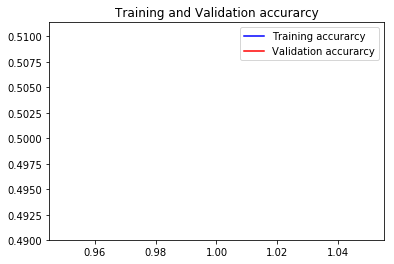

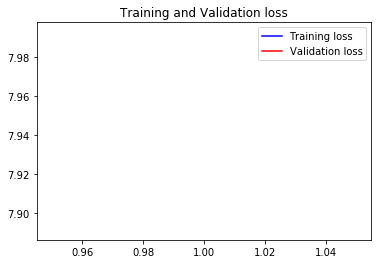

In [58]:
#### On affiche notre accuracy en fonction du nombre d'epoch

acc = history.history['acc']### Paramètre du modèle: Accuracy
val_acc = history.history['val_acc'] ### Paramètre du modèle: Val_acc
loss = history.history['loss'] ### Paramètre du modèle: loss
val_loss = history.history['val_loss'] ### Paramètre du modèle: val_loss

epochs = range(1, len(acc) + 1) ### Ensemble d'epoch testée

# Affichage de l'accuracy en fonction du nombre d'epoch
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

# Affichage de la loss en fonction du nombre d'epoch
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

On fait quasiement aussi bien que le hasard. Ici le modèle n'a pas d'intérêt.

### c) InceptionV3

**Inception V3** est un modèle developpé par Google.
Il est composée de 42 couches profondes. Son coût de computation est 2.5 fois plus élevée que GoogLeNet et VGGNet sur la compétition **ILSVRC 2015**.

<img src = "img/inceptionv3.png" width = "700">

 ### Lancement de InceptionV3
    
    
    

In [59]:
#### Inception_v3

import keras
import numpy as np
from keras.applications import inception_v3

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(inception_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

batch_size = 128  

train_datagen = ImageDataGenerator(rescale=1./255,   
                                    fill_mode='nearest')


#### On redimensionne les pixels des images pour qu'ils soient entre 0 et 1

val_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow(X_train, y_train,  batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

Epoch 1/1
53/53 [==============================] - 3197s 60s/step - loss: 0.5218 - acc: 0.8144 - val_loss: 7.3437 - val_acc: 0.5191


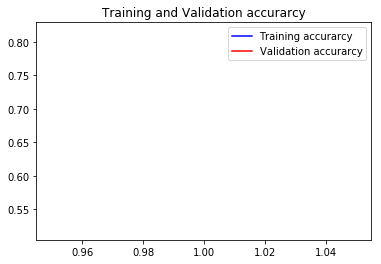

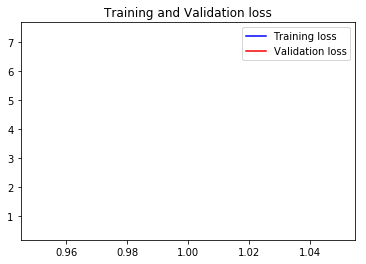

In [44]:
#### On lance le modèle Inception V3

ntrain = len(X_train)
nval = len(X_val)

epochs = 1 #### Nombre d'epoch que l'on fixe
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### d) ResNet50

ResNet50 est un modèle publiée par Microsoft research qui a l'avantage d'être très précis. Son gain en précision vient de ses dépenses en coût de computation. 

**Précision**:  Jeu de données **ILSVRC 2012** - Précision Top 5:  **92.02%**

**Taille du modèle**: 100 mb

**Architecture**:  50 couches de blocks similaires avec une connexion bypass comme montrer en dessous:

<img src = "img/resnet4.png" width = "400">

Les raccourcis servent de simplificateur de modèles. Si le raccourci est dominant, la couche concernée est ignorée, ce qui réduit de fait la complexité du modèle.

**Avantage**:

Accuracy élevée: Les ResNet ont eu les meilleurs performances en battant VGG et GooGleNet sur le jeu de données ILSVRC 2012. De plus, ResNet a gagné la première place à la compétition **ILSVRC 2015** avec un taux d'erreur de 3.57%.

**Inconvénient**:

Il s'agit d'un modèle relativement complexe, bien que son concept soit simple. 
L'implémentation de **ResNet** est très compliqué à cause de l'usage élevé des raccourcis de chemin qui peut ne pas utiliser les couches et les ré-échantillonnage (pooling), ainsi que les opérations de normalisations. Cela a pour conséquence d'augmenter le debugging et le coût d'innovation.

<img src = "img/resnet_result.png" width = "400">

**Observation**:

Sur le jeu de données ILSVRC-2015:

1. ResNet converge plus vite quand on le compare à ses concurents.
2. ResNet 34 a un pourcentage de validation d'erreur de 5.71% qui est mieux que BN-Inception et VGG. ResNe-152 a un pourcentage de validation d'erreur de 4.49%. (Au passage la compétition est gagné par un ensemmble de 6 modèles différents ayant une erreur de 3.57%).

In [60]:
#### Resnet50

#### On rajoute également Resnet50

import keras
import numpy as np
from keras.applications import resnet50

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(resnet_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

batch_size = 128  

train_datagen = ImageDataGenerator(rescale=1./255,  
                                    fill_mode='nearest')


#### On redimensionne les pixels des images pour qu'ils soient entre 0 et 1

val_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow(X_train, y_train,  batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

C:\Users\YacineASLIMI\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/1
53/53 [==============================] - 9953s 188s/step - loss: 1.2776 - acc: 0.7111 - val_loss: 1.5517 - val_acc: 0.5911


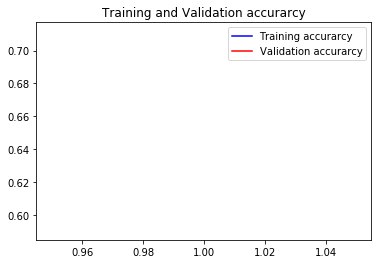

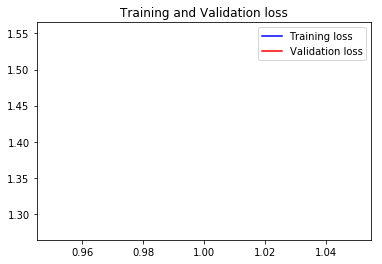

In [46]:
#### On lance le modèle ResNet50

ntrain = len(X_train)
nval = len(X_val)

epochs = 1
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### e) MobileNet

Les mobilenets ont été inventés par Google et implémentés dans Tensorflow.
Par rapport au CNN, les deux algorithmes sont identiques excepté pour la partie convolution.

Si dans le premier cas, la convolution standard est de **taille 3*3**, dans celui de mobilenet l'étape de convolution est divisée en deux partie que l'on appelle *couche de convolution séparable profonde*. *(Depthwise separable convolution)*

Les avantages de ces mobilesnets est qu'ils sont:

* Extrémement légers et petits ie que la taille des ligne de code est faible.
* Rapides (Temps de calcul très faible*)
* Précis
* Facilement configurable 
* Dédiés à l'embarquée et aux smartphones 

<img src = "img/mobilenet.PNG" width = "1000">

L'étape de convolution est constituée  d':
* Une convolution profonde (*depthwise convolution*) de **taille 3*3**
* Une convolution ponctuelle (*pointwise convolution*) de **taille 1*1**

#### Une convolution profonde (depthwise convolution) de **taille 3*3**
Cette couche sert à appliquer un filtre unique à chaque channel d'entrée. Il y a trois channels d'entrée **RGB**.
Elle diffère de la convoluton classique, qui elle combine les entrants en un nouvel ensemble de résultat.

<img src = "img/mobilenet_etape_convo.PNG" width = "400">

* Une convolution ponctuelle (*pointwise convolution*) de **taille 1*1**

Il s'agit d'une phase de convolution classique à ceci près qu'elle est idenpendante de la couche précédente et qu'elle applique une convolution de **taille 1*1 ** pour combiner les sortants de * la depthwise convolution *.


<img src ="img/depth.jpg" width = "500">

Ainsi notre algorithme va appliquer un filtre sur chacun des channel et va recombiner les résultats.
Ici la profondeurs des parallépipèdes représente les channels.

#### Application des mobilenets

In [3]:
# import numpy as np
# from keras.models import Model
# from keras.preprocessing import image
# from keras.applications import imagenet_utils, mobilenet
# # import tensorflowjs as tfjs

In [4]:
# def process_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))#### Converstion de l'image en (224,224)
#     img_array = image.img_to_array(img) ### Converti l'imagen tableau
#     img_array = np.expand_dims(img_array, axis=0) #### Etendre les dimensions des tableau numpy en utilisant 
#     pImg = mobilenet.preprocess_input(img_array) #### On rééchelonne les images pour les avoir entre -1 et 1
#     return pImg

In [7]:
#### On crée les jeux de train et de test

#### Chemin d'accès jusqu'au jeu d'entraineemnt et de test (A modifier sur votre machine)
train_dir = 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train'
test_dir = 'C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test'

### Séparation des élements "dog" et "cat"

#### Pour le jeu de train, on sépare les éléments 'dog' et 'cat' et l'on stocke chacun dans une variable
train_dogs = ['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] 
train_cats = ['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/train/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  

#### On stocke les élements du jeu de test (liste de chemin) dans la variable test_imgs
test_imgs = ['C:/Users/YacineASLIMI/Documents/Test_Deep_learning/redux-kernels-edition/test/test/{}'.format(i) for i in os.listdir(test_dir)] 

In [21]:
img_size = 224

#### On définit une fonction qui prend en entrée une liste d'image
def read_and_process_image(list_of_images):
    """
    La fonctionne renvoie trois tableaux (array): 
        X est le tableau des images redimentionné (resize) 
        y est le ableau des cible (label) 
        l_id est un tableau qui contient les nom (chien, chat) pour la soumission du script kaggle 
    """
    X = [] # On initialise une liste qui comprendras les images
    y = [] # On initialise une liste qui comprendras les abels
    l_id = [] # On initialise une liste qui comprendras les id (dog, cat)
    
    
    #### Pour chaque élement de la liste d'image
    for image in list_of_images:

        ### On ajoute dans la liste X les images redimensionnés 
        
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (img_size,img_size)))  #Lecture et redimensionnement de l'image
        
        
        basename = os.path.basename(image)# On stocke le chemin de chaque image dans la variable basename
        img_num = basename.split('.')[0] # On extrait le nom de l'animal ie 'dog' ou 'cat'
        l_id.append(img_num) ### On ajoute ce nom dans la liste l_id
        
        ### On crée un vecteur de cible y pour les modalités "dog" et "cat"
        if 'cat' in image: ### Si la chaine de caractère "dog" est contenu dans la liste "image" alors on ajoute un 1 à la liste y
            y.append(1)
        #### Sinon 0    
        else:
            y.append(0)
    
    return X, y, l_id #### On retourne trois élements, les images redimentionnés, le vecteur cible et l_id



In [41]:
#### Modification du jeu d'entrainement

size=4000 ### On prend 4000 éléments de la liste "chien" et 4000 élements de la liste "chat"
train_imgs = train_dogs[0:size] + train_cats[0:size]
# type(train_imgs)
random.shuffle(train_imgs) #### On mélange aléatoirement les élements 'dog' et 'cat'
#print(train_imgs)

In [42]:
#### On crée trois nouvelles variables qui correspondent aux images redimentionnées, à la cible et a la liste de modalité kaggle

X, y, l_id = read_and_process_image(train_imgs)

In [43]:
#### Conversion en numpy array

X = np.array(X)
y = np.array(y)
l_id = np.array(l_id)

In [44]:
print("Taille de X", X.shape)
print("Taille de y", y.shape)
print("Taille de l_id", l_id.shape)

Taille de X (8000, 224, 224, 3)
Taille de y (8000,)
Taille de l_id (8000,)


In [45]:
### On crée un jeu de validation à partir de notre train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)
X_train = np.array(X_train) ### On convertit nos images en array numpy pour pouvoir les afficher
y_train = np.array(y_train)
X_val = np.array(X_val) ### On convertit nos images en array numpy pour pouvoir les afficher
y_val = np.array(y_val)

In [48]:
print("Taille de X", X_train.shape)
print("Taille de y", y_train.shape)
print("Taille de X_val", X_val.shape)
print("Taille de y_val", y_val.shape)

Taille de X (6800, 224, 224, 3)
Taille de y (6800,)
Taille de X_val (1200, 224, 224, 3)
Taille de y_val (1200,)


In [49]:
X_train = X_train.reshape((-1,224,224,3))
y_train = y_train.reshape((-1,224,224,3))
X_val = X_val.reshape((-1,224,224,3))
y_val = y_val.reshape((-1,224,224,3))

ValueError: cannot reshape array of size 6800 into shape (224,224,3)

In [34]:
print(X_train.shape)

(23999, 224, 224)


In [54]:
#### Mobile Net 

import keras
import numpy as np
from keras.applications import mobilenet

#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top = False, input_shape = (224,224,3))

model = models.Sequential()
model.add(mobilenet_model)
model.add(layers.Flatten())#### Ajout du Flatten après la convolution pour faire que la donnée n'est que 2 dimensions

#### Les données d'entrée doivent être compatible avec le modèle
#### La forme de X_train doit être (6800,224,224,3)
#### Le format de l'entrée (input_shape) du modèle doit être (224,224,3)

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

batch_size = 128  

train_datagen = ImageDataGenerator(rescale=1./255,   
                                    fill_mode='nearest')


#### On redimensionne les pixels des images pour qu'ils soient entre 0 et 1

val_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow(X_train, y_train,  batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

Epoch 1/1
53/53 [==============================] - 7667s 145s/step - loss: 7.8693 - acc: 0.4978 - val_loss: 7.9712 - val_acc: 0.5000


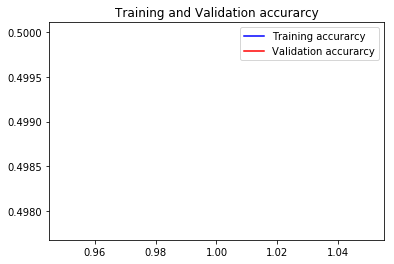

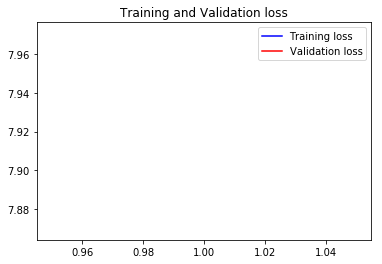

In [55]:
#### On lance le modèle mobilenet

ntrain = len(X_train)
nval = len(X_val)

epochs = 1
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

On a ici un très mauvais modèle. Une **validate accuracy** à **0.5**. Autrement dit, on fait aussi bien que le hasard. Il n'y a donc aucun intérêt à utiliser ce modèle.(Il s'agit d'un test sur un seul epoch).

## IV- Résultats

On trouveras, ci-joint, un comparatif des différents modèle testés sur notre jeu d'entrainement.
Il resort du test fait sur **un seul epoch** et sur un **batch size** à **128**, que le modèle **Inception ResNet** est le plus performant.
Evidement, il s'agirait par la suite, de faire un Grid search des ces différents modèles pour trouver le plus performant et donc d'avoir une capacité de calcul conséquente.


<img src = "img/result_model_.PNG" width = "800">

## V -  Sources

* Kaggle- Kernels- https://www.kaggle.com/c/dogs-vs-cats/kernels
* Medium - sh.tsang - https://medium.com/@sh.tsang/review-inception-v3-1st-runner-up-image-classification-in-ilsvrc-2015-17915421f77c
* Arxiv: InceptionV3 – Google - https://arxiv.org/pdf/1512.00567v3.pdf
* Arxiv: InceptionV4 – Inception-ResNet – Google - https://arxiv.org/pdf/1602.07261.pdf
* OpenClassroom - https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5088816-apprenez-a-construire-un-cnn-et-gagnez-du-temps-avec-le-transfer-learning
* Imagenet - http://image-net.org/challenges/LSVRC/2012/
* GoogleAi - https://ai.googleblog.com/2016/08/improving-inception-and-image.html
